In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
import requests

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [30]:
from citipy import citipy

In [31]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [32]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [34]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20cccac0568d9353ebbe4487610dc5b0'

In [35]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
       
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | hefei
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | malwan
City not found. Skipping...
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | muromtsevo
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | vila do maio
Processing Record 13 of Set 1 | am timan
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | hofn
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | maracacume
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | ochakiv
Processing Record 23 of Set 1 | caravelas
Proce

Processing Record 42 of Set 4 | leh
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | prince rupert
Processing Record 45 of Set 4 | padang
Processing Record 46 of Set 4 | mokshan
Processing Record 47 of Set 4 | zavetnoye
Processing Record 48 of Set 4 | katha
City not found. Skipping...
Processing Record 49 of Set 4 | uspenka
Processing Record 50 of Set 4 | sungairaya
Processing Record 1 of Set 5 | sainte-marie
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | luebo
Processing Record 4 of Set 5 | tabriz
Processing Record 5 of Set 5 | necochea
Processing Record 6 of Set 5 | talcahuano
Processing Record 7 of Set 5 | bani walid
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | los llanos de aridane
Processing Record 10 of Set 5 | victoria
Processing Record 11 of Set 5 | limon
Processing Record 12 of Set 5 | surgut
Processing Record 13 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 5 | port 

Processing Record 31 of Set 8 | pocone
Processing Record 32 of Set 8 | khandbari
Processing Record 33 of Set 8 | karpathos
Processing Record 34 of Set 8 | hengshui
Processing Record 35 of Set 8 | iracoubo
Processing Record 36 of Set 8 | mashhad
Processing Record 37 of Set 8 | ahlat
Processing Record 38 of Set 8 | larsnes
Processing Record 39 of Set 8 | yoichi
Processing Record 40 of Set 8 | thayetmyo
Processing Record 41 of Set 8 | zhezkazgan
Processing Record 42 of Set 8 | cabo san lucas
Processing Record 43 of Set 8 | borgarnes
Processing Record 44 of Set 8 | menomonie
Processing Record 45 of Set 8 | isangel
Processing Record 46 of Set 8 | reggello
Processing Record 47 of Set 8 | partenit
Processing Record 48 of Set 8 | fort nelson
Processing Record 49 of Set 8 | oblivskaya
Processing Record 50 of Set 8 | luena
Processing Record 1 of Set 9 | morant bay
Processing Record 2 of Set 9 | naze
Processing Record 3 of Set 9 | zarechnyy
Processing Record 4 of Set 9 | bud
Processing Record 5 o

Processing Record 26 of Set 12 | qui nhon
Processing Record 27 of Set 12 | svetlaya
Processing Record 28 of Set 12 | san cristobal
Processing Record 29 of Set 12 | namibe
Processing Record 30 of Set 12 | chochola
Processing Record 31 of Set 12 | najran
Processing Record 32 of Set 12 | yotsukaido
Processing Record 33 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 34 of Set 12 | bobcaygeon
Processing Record 35 of Set 12 | mahon
Processing Record 36 of Set 12 | igunga
Processing Record 37 of Set 12 | gaogou
Processing Record 38 of Set 12 | yirol
City not found. Skipping...
Processing Record 39 of Set 12 | rojhan
Processing Record 40 of Set 12 | tambopata
Processing Record 41 of Set 12 | were ilu
Processing Record 42 of Set 12 | takoradi
Processing Record 43 of Set 12 | coquimbo
Processing Record 44 of Set 12 | kasongo-lunda
Processing Record 45 of Set 12 | likhoslavl
Processing Record 46 of Set 12 | yeniseysk
Processing Record 47 of Set 12 | egvekinot
Processing Record 

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
print(city_data_df.head(10))


           City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  Ponta Do Sol  32.6667  -17.1000     70.43        76           5   
1       Mataura -46.1927  168.8643     44.22        64         100   
2         Hefei  31.8639  117.2808     89.62        74          20   
3       Ahipara -35.1667  173.1667     59.09        96         100   
4    Georgetown   5.4112  100.3354     80.89        92          40   
5     Busselton -33.6500  115.3333     55.90        66          87   
6      Khatanga  71.9667  102.5000     45.18        59         100   
7    Muromtsevo  56.3724   75.2418     69.26        88          34   
8      Saldanha -33.0117   17.9442     50.05        80          56   
9  Vila Do Maio  15.1333  -23.2167     77.79        83           0   

   Wind Speed Country                 Date  
0        4.14      PT  2022-07-11 00:36:18  
1        5.30      NZ  2022-07-11 00:36:19  
2        4.47      CN  2022-07-11 00:36:19  
3        8.66      NZ  2022-07-11 00:36:20  
4   

In [38]:
new_column_order = ["Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [43]:
# Get today's date in seconds.
today = time.time()
today

1657501898.279385

In [45]:
today= time.strftime("%x")
today

'07/10/22'

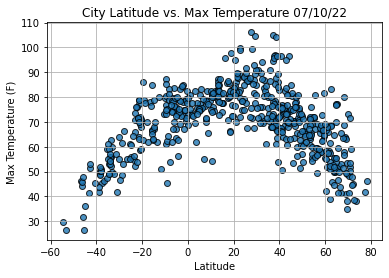

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()